In [64]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
SP=pd.read_csv('portfolio_equities.csv',delimiter=',',index_col='date')
SP_montly=pd.read_csv('portfolio_equities_monthly.csv',delimiter=',',index_col='date')
SP_montly

,PERMNO,TICKER,COMNAM,PRC
date,,,,
12/31/1986,10333,XOMA,XOMA CORP,11.875
01/30/1987,10333,XOMA,XOMA CORP,15.500
02/27/1987,10333,XOMA,XOMA CORP,20.250
03/31/1987,10333,XOMA,XOMA CORP,28.000
04/30/1987,10333,XOMA,XOMA CORP,28.500
05/29/1987,10333,XOMA,XOMA CORP,23.000
06/30/1987,10333,XOMA,XOMA CORP,20.000
07/31/1987,10333,XOMA,XOMA CORP,19.500
08/31/1987,10333,XOMA,XOMA CORP,21.500


In [126]:
def get_equities_data(SP,permno):
    matrix = SP.loc[lambda SP: SP['PERMNO'] == permno]
    return abs(matrix['PRC'])

SP.dropna(inplace=True)
SP_montly.dropna(inplace=True)

permnos = SP_montly.drop_duplicates('PERMNO')
permnos = permnos['PERMNO'].values
tickers = SP_montly.drop_duplicates('TICKER')
tickers = tickers['TICKER'].values
    
print(permnos)
print(tickers)

[10333 12490 14593 17778 43449 48725 55976]
['XOMA' 'IBM' 'AAPL' 'BKHT' 'BRK' 'MCD' 'UNP' 'WMT']


In [127]:
matrix_daily = SP.loc[lambda SP: SP['PERMNO'] == permnos[0]]
index_daily = matrix_daily.index

matrix_monthly = SP_montly.loc[lambda SP_montly: SP_montly['PERMNO'] == permnos[0]]
index_monthly = matrix_monthly.index

columns = ['XOMA','IBM','AAPL','BRK','MCD','UNP','WMT']

df_daily = pd.DataFrame(index=index_daily, columns=columns)
df_daily = df_daily.fillna(0)

df_monthly = pd.DataFrame(index=index_monthly, columns=columns)
df_monthly = df_monthly.fillna(0)


df_daily['XOMA'] = get_equities_data(SP,permnos[0])
df_daily['IBM'] = get_equities_data(SP,permnos[1])
df_daily['AAPL'] = get_equities_data(SP,permnos[2])
df_daily['BRK'] = get_equities_data(SP,permnos[3])
df_daily['MCD'] = get_equities_data(SP,permnos[4])
df_daily['UNP'] = get_equities_data(SP,permnos[5])
df_daily['WMT'] = get_equities_data(SP,permnos[6])

df_monthly['XOMA'] = get_equities_data(SP_montly,permnos[0])
df_monthly['IBM'] = get_equities_data(SP_montly,permnos[1])
df_monthly['AAPL'] = get_equities_data(SP_montly,permnos[2])
df_monthly['BRK'] = get_equities_data(SP_montly,permnos[3])
df_monthly['MCD'] = get_equities_data(SP_montly,permnos[4])
df_monthly['UNP'] = get_equities_data(SP_montly,permnos[5])
df_monthly['WMT'] = get_equities_data(SP_montly,permnos[6])

df_monthly

,XOMA,IBM,AAPL,BRK,MCD,UNP,WMT
date,,,,,,,
12/31/1986,11.8750,120.00000,40.50000,2820.00000,60.87500,62.25000,46.500
01/30/1987,15.5000,128.75000,55.50000,3100.00000,69.75000,68.50000,48.500
02/27/1987,20.2500,139.50000,70.00000,3360.00000,76.25000,72.62500,54.750
03/31/1987,28.0000,150.12500,64.50000,3520.00000,79.25000,75.00000,57.500
04/30/1987,28.5000,160.12500,79.25000,3380.00000,80.00000,71.37500,56.625
05/29/1987,23.0000,160.00000,79.00000,3410.00000,78.75000,70.75000,58.500
06/30/1987,20.0000,162.50000,40.50000,3500.00000,53.00000,78.37500,67.625
07/31/1987,19.5000,161.00000,41.25000,3960.00000,55.50000,84.75000,37.250
08/31/1987,21.5000,168.37500,54.00000,3990.00000,58.25000,79.75000,40.500


In [128]:
ret_daily= df_daily.pct_change(1)
ret_daily = ret_daily.drop(ret_daily.index[[0]])

ret_monthly= df_monthly.pct_change(1)
ret_monthly = ret_monthly.drop(ret_monthly.index[[0]])

ret_monthly

,XOMA,IBM,AAPL,BRK,MCD,UNP,WMT
date,,,,,,,
01/30/1987,0.305263,0.072917,0.370370,0.099291,0.145791,0.100402,0.043011
02/27/1987,0.306452,0.083495,0.261261,0.083871,0.093190,0.060219,0.128866
03/31/1987,0.382716,0.076165,-0.078571,0.047619,0.039344,0.032702,0.050228
04/30/1987,0.017857,0.066611,0.228682,-0.039773,0.009464,-0.048333,-0.015217
05/29/1987,-0.192982,-0.000781,-0.003155,0.008876,-0.015625,-0.008757,0.033113
06/30/1987,-0.130435,0.015625,-0.487342,0.026393,-0.326984,0.107774,0.155983
07/31/1987,-0.025000,-0.009231,0.018519,0.131429,0.047170,0.081340,-0.449168
08/31/1987,0.102564,0.045807,0.309091,0.007576,0.049550,-0.058997,0.087248
09/30/1987,-0.127907,-0.104677,0.046296,0.057644,-0.072961,0.004702,-0.064815


In [82]:

#This code loads the totalReturns.csv file, 
#which has the dates in the first column,
#the data (in index level) for the four asset classes in columns 2 to 5
#and the risk-free rate (1-month T-bill rate) in column 6. 
S=pd.read_csv('totalReturns.csv',delimiter=',',index_col='Date')
S = S.drop('Unnamed: 6',1)

#compute returns
ret= S.pct_change(1) #take one month before in order to be able to calculate the first return
print(ret)
ret = ret.drop('1M T-bill rate',1)
Rf = S.iloc[:,-1].shift(1)#/12 
Rf = Rf.drop(Rf.index[[0]])
ret = ret.drop(ret.index[[0]])
print(Rf)

#compute portfolio weights
roll_mean = ret.rolling(window=120,min_periods=120).mean() #rolling window = 12 month * 10 years of data to define returns of each portfolios
roll_std = ret.rolling(window=120,min_periods=120).std()
roll_cov = ret.rolling(window=120,min_periods=120).cov()
roll_Rf = Rf.rolling(window=120,min_periods=120).mean()

            Treasury (ML)  Corporate bonds (ML)  US stocks (MSCI)  \
Date                                                                
12/31/1977            NaN                   NaN               NaN   
1/31/1978       -0.001510             -0.004277         -0.057509   
2/28/1978        0.004156              0.002441         -0.021515   
3/31/1978        0.002833              0.005239          0.025207   
4/30/1978        0.001084             -0.000180          0.095357   
5/31/1978       -0.001649             -0.007326          0.004837   
6/30/1978       -0.001702              0.002390         -0.015096   
7/31/1978        0.009230              0.011460          0.061293   
8/31/1978        0.011299              0.019438          0.027043   
9/30/1978        0.000576             -0.002032         -0.003661   
10/31/1978      -0.011713             -0.018158         -0.084471   
11/30/1978       0.010262              0.011292          0.020840   
12/31/1978      -0.006306         

In [54]:
ONES = np.ones(4)

dates = ret.iloc[119:].index.get_level_values(0)
print(dates)

w = np.zeros((len(dates), 4, 4))
i = 0
for date in dates: 
    # esimation of parameters
    MU = roll_mean.loc[date].values
    STD = roll_std.loc[date].values
    SIGMA = roll_cov.loc[date].values
    INV_SIGMA = np.linalg.inv(SIGMA)
    #R0 = roll_Rf.loc[date]
    #i.e., estimation of risk premium (mu-R0)
    #An alternative is to esimate the expected return mu,
    #and to use the current risk-free rate to compute the weights.
    #In this second case, set: 
    R0 = Rf.loc[date]
    
    A = (ONES@INV_SIGMA)@ONES
    B = (ONES@INV_SIGMA)@MU
    C = (MU@INV_SIGMA)@MU
    DELTA = A*C-B**2
    
    # composition of portfolio
    w[i,0,:] = (INV_SIGMA@(MU-R0))/(B-A*R0) #TAN
    w[i,1,:] = (INV_SIGMA@ONES)/A # GMV
    tmp = 1/STD
    w[i,2,:] = tmp/tmp.sum() #RP
    w[i,3,:] = np.ones(4)/4 #EW
    i=i+1
    

Index(['12/31/1987', '1/31/1988', '2/29/1988', '3/31/1988', '4/30/1988',
       '5/31/1988', '6/30/1988', '7/31/1988', '8/31/1988', '9/30/1988',
       ...
       '5/31/2015', '6/30/2015', '7/31/2015', '8/31/2015', '9/30/2015',
       '10/31/2015', '11/30/2015', '12/31/2015', '1/31/2016', '2/29/2016'],
      dtype='object', name='Date', length=339)



 (a) Time series of the portfolio weights:


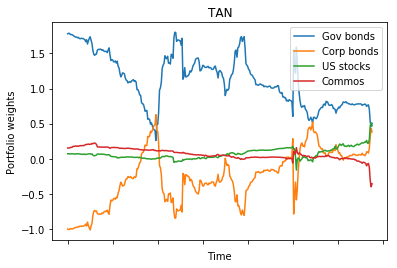

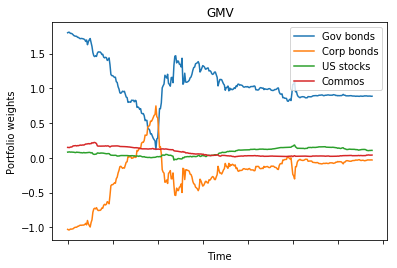

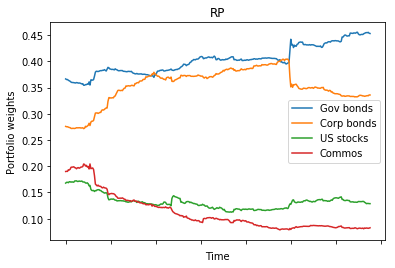

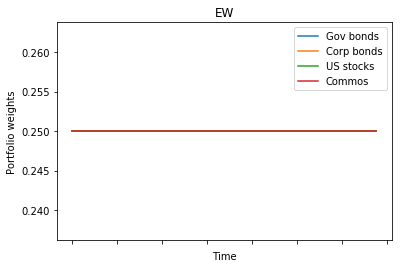

In [55]:
#plotting portfolios
asset_classes = ['Gov bonds', 'Corp bonds', 'US stocks', 'Commos']
strategies = ['TAN','GMV','RP','EW']

print('\n (a) Time series of the portfolio weights:')
for i in range(len(strategies)): 
    df_w = pd.DataFrame(data=w[:,i,:],index=dates,columns=asset_classes)
    df_w.plot(title=strategies[i])
    plt.xlabel('Time')
    plt.ylabel('Portfolio weights')
    plt.legend(asset_classes, loc=0)
    plt.show()

In [56]:
#computing portfolio returns
dates_perf = ret.iloc[120:].index.get_level_values(0)

p_perf = np.zeros((len(dates_perf), 4))
for j in range(len(strategies)): 
    tmp = np.multiply(w[:-1,j,:],ret.iloc[120:]) # :-1 means except the last
    p_perf[:,j] = tmp.sum(axis=1) # sum over each lines of the matrix and p_perf = returns on each portfolios [return port for each time, strategies]
    
df_p_perf = pd.DataFrame(data=p_perf,index=dates_perf,columns=strategies)

R0 = Rf.loc[dates_perf].mean()
M = df_p_perf.mean()
E = df_p_perf.mean()-R0
S = df_p_perf.std()
SR = E/S
index = ['Mean Return', 'Mean Excess Return', 'Std. Dev.', 'Sharpe Ratio']
pStats = pd.DataFrame({index[0] : M, 
                    index[1] : E,
                    index[2] : S, 
                    index[3] : SR
                      })
pStats = pStats.T
pStats = pStats.reindex(index)

index_a = [' (ann.)']*4
index_a = [x+y for x, y in zip(index, index_a)]
pStats_a = pd.DataFrame({index_a[0] : M*12,
                    index_a[1] : E*12,
                    index_a[2] : S*np.sqrt(12),
                    index_a[3] : SR*np.sqrt(12)
                      })
pStats_a = pStats_a.T
pStats_a = pStats_a.reindex(index_a)

print('\n (b) Mean, standard deviation and Sharpe ratio of portfolio returns:')
print('\n The monthly return statistics of the strategies are:')
display(np.around(pStats,6))
print('\n The annualized return statistics of the strategies are:')
display(np.around(pStats_a,6))


 (b) Mean, standard deviation and Sharpe ratio of portfolio returns:

 The monthly return statistics of the strategies are:


,TAN,GMV,RP,EW
Mean Return,0.005431,0.005455,0.006061,0.005984
Mean Excess Return,-0.026767,-0.026743,-0.026136,-0.026214
Std. Dev.,0.013128,0.012465,0.013679,0.021296
Sharpe Ratio,-2.038921,-2.145447,-1.910681,-1.230933



 The annualized return statistics of the strategies are:


,TAN,GMV,RP,EW
Mean Return (ann.),0.065171,0.065455,0.072734,0.071808
Mean Excess Return (ann.),-0.321201,-0.320917,-0.313637,-0.314563
Std. Dev. (ann.),0.045476,0.043180,0.047386,0.073770
Sharpe Ratio (ann.),-7.063028,-7.432045,-6.618794,-4.264078



 (d) Minimum-variance frontier and location of the 4 portfolios using ex-post performance:


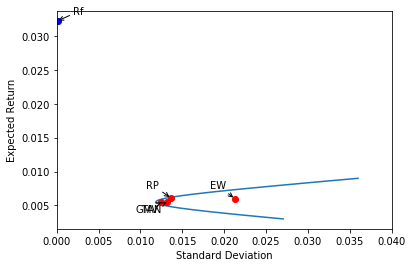

In [57]:
#MV frontiers
Mup = np.linspace(0.003,0.009,1000)
MU = ret.loc[dates_perf].mean().values
SIGMA = ret.loc[dates_perf].cov().values
INV_SIGMA = np.linalg.inv(SIGMA)

A = (ONES@INV_SIGMA)@ONES
B = (ONES@INV_SIGMA)@MU
C = (MU@INV_SIGMA)@MU
DELTA = A*C-B**2

Sigmap = np.sqrt((A*np.multiply(Mup,Mup)-2*B*Mup+C)/DELTA)

plt.plot(Sigmap,Mup)
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.plot(S,M,'ro')
plt.plot(0.0001,R0,'bo')
plt.xlim(0, 0.04)

plt.annotate('TAN', xy=(S[0],M[0]), xytext=(S[0]-.003, M[0]-.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('GMV', xy=(S[1],M[1]), xytext=(S[1]-.003, M[1]-.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('RP', xy=(S[2],M[2]), xytext=(S[2]-.003, M[2]+.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('EW', xy=(S[3],M[3]), xytext=(S[3]-.003, M[3]+.0015),
            arrowprops=dict(arrowstyle="->")
            )
plt.annotate('Rf', xy=(0, R0), xytext=(.001+.001, R0+.001),
            arrowprops=dict(arrowstyle="->")          
            )

print('\n (d) Minimum-variance frontier and location of the 4 portfolios using ex-post performance:')
plt.show()


 (e) Cumulative performance of 1$ invested in December 1987:


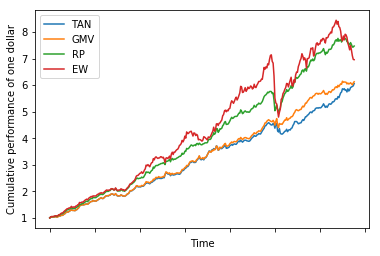

In [58]:
#total return index
dates_cumperf = ret.iloc[119:].index.get_level_values(0)
cumperf = np.cumprod(np.concatenate((ONES.reshape(1,4),1+p_perf),axis=0),axis=0)
df_cumperf = pd.DataFrame(data=cumperf,index=dates_cumperf,columns=strategies)

df_cumperf.plot()
plt.xlabel('Time')
plt.ylabel('Cumulative performance of one dollar')
plt.legend(strategies, loc=0)


print('\n (e) Cumulative performance of 1$ invested in December 1987:')
plt.show()


In [59]:

labels = np.zeros(len(p_perf))
for i in range(len(p_perf)): # the goal is to define the classification of the labels for the crossentropy loss
    opt = np.argmax(p_perf[i,:])
    labels[i] = opt
print(labels.shape)

(338,)


In [60]:
# Here let's deifne the input of our model and beware to 
# take the returns of the month before the optimal portfolio choice 

print(ret.shape)
input_price = pd.DataFrame(ret.iloc[119:-1].values,columns=['Treasury','Corporatebonds','USstocks','Commodities'])
input_mean = pd.DataFrame(roll_mean[119:-1].values,columns=['Treasury_mean','Corporatebonds_mean','USstocks_mean','Commodities_mean'])
input_std = pd.DataFrame(roll_std[119:-1].values,columns=['Treasury_std','Corporatebonds_std','USstocks_std','Commodities_std'])

dates = ret.iloc[119:-1].index.get_level_values(0)
concat = pd.concat([input_price, input_mean, input_std], axis=1)
concat.index = dates

inputs = concat[['Treasury','Treasury_mean','Treasury_std','Corporatebonds','Corporatebonds_mean','Corporatebonds_std','USstocks','USstocks_mean','USstocks_std','Commodities','Commodities_mean','Commodities_std']]
print(inputs)

(458, 4)
            Treasury  Treasury_mean  Treasury_std  Corporatebonds  \
Date                                                                
12/31/1987  0.012062       0.008721      0.022129        0.014880   
1/31/1988   0.034202       0.009019      0.022230        0.038295   
2/29/1988   0.010889       0.009075      0.022227        0.016797   
3/31/1988  -0.011407       0.008956      0.022298       -0.011377   
4/30/1988  -0.005130       0.008904      0.022324       -0.009911   
5/31/1988  -0.008693       0.008846      0.022361       -0.007570   
6/30/1988   0.022948       0.009051      0.022376        0.026837   
7/31/1988  -0.006732       0.008918      0.022423       -0.000727   
8/31/1988   0.001514       0.008836      0.022432        0.006626   
9/30/1988   0.022526       0.009019      0.022453        0.022728   
10/31/1988  0.017694       0.009264      0.022386        0.016142   
11/30/1988 -0.012105       0.009078      0.022470       -0.007322   
12/31/1988  0.003986     

In [61]:
#let's define the lSTM network 

import torch
from torch import nn
from math import sqrt
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms


    
class LSTM(nn.Module):

    def __init__(self,input_size,output_size,batch_size,num_layers,hidden_size):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.batch_size = batch_size

        # The LSTM takes features as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(input_size, hidden_size)

        # The linear layer that maps from hidden state space to output space
        self.hidden2output = nn.Linear(hidden_size, output_size)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_size),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_size))

    def forward(self, input_seq):
        
        output_seq, self.hidden = self.lstm(input_seq, self.hidden)#, None)
        last_output = output_seq[-1]
        output = self.hidden2output(last_output)
        m = nn.Sigmoid() #using a sigmoid to avoid negative value of the BCELoss
        output = m(output)
        
        return output
    
    def predict(self,x):
        out = self.forward(x)
        return out
        
    